In [1]:
import numpy as np
import pandas as pd
from numpy import linalg as LA

In [2]:
scores = pd.read_csv("CFB2019_scores.csv", header=None)
scores = scores.rename(columns={0:'a_index', 1:'a_points', 2:'b_index', 3:'b_points'})
scores

,a_index,a_points,b_index,b_points
0,695,34,141,14
1,392,20,218,24
2,29,38,270,45
3,721,6,531,16
4,769,45,560,22
...,...,...,...,...
4274,494,30,450,21
4275,662,30,589,13
4276,393,17,354,27
4277,304,20,469,28


In [3]:
team_names = pd.read_csv('TeamNames.txt', header=None)
team_names = team_names.rename(columns={0:'Name'})
team_names

,Name
0,AbileneChristian
1,AdamsSt
2,Adrian
3,AirForce
4,Akron
...,...
764,Wooster
765,WorcesterSt
766,Wyoming
767,Yale


In [4]:
M = np.array(pd.DataFrame(np.zeros((769, 769))))
M

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [71]:
scores.iloc[0]

a_index     695
a_points     34
b_index     141
b_points     14
Name: 0, dtype: int64

In [5]:
def populate_M(M, scores):
    for i in range(len(scores)):
        a_point = scores.iloc[i]['a_points']
        b_point = scores.iloc[i]['b_points']
        a_index = scores.iloc[i]['a_index'] - 1
        b_index = scores.iloc[i]['b_index'] - 1

        a_win = 0
        b_win = 1
        if a_point > b_point:
            a_win = 1
            b_win = 0
        
    
        M[a_index][a_index] = M[a_index][a_index] + a_win + a_point / (a_point + b_point)
        M[b_index][b_index] = M[b_index][b_index] + b_win + b_point / (a_point + b_point)
        M[a_index][b_index] = M[a_index][b_index] + b_win + b_point / (a_point + b_point)
        M[b_index][a_index] = M[b_index][a_index] + a_win + a_point / (a_point + b_point)
        
    return M

In [6]:
un_M = populate_M(M, scores)

In [7]:
un_M_df = pd.DataFrame(un_M)
M = np.array(un_M_df.div(un_M_df.sum(axis=1), axis=0))
M

array([[0.44774761, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.36792891, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.45643088, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.59847937, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.74948844,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.52110898]])

In [8]:
w_t = [1/769 for x in range(769)] 

In [9]:
from numpy.linalg import matrix_power

def ranking(M, w_t, t):
    temp = M.copy()
#     for i in range(t-1):
#         temp = temp @ M
    temp = matrix_power(temp, t)
    
    w_final = np.dot(w_t, temp)
    #try matrix power
    
    return w_final

In [10]:
def get_25(vector):
    dic = {}
    for i in range(len(vector)):
        dic[i] = vector[i]
    
    sorted_dict = dict(sorted(dic.items(), key=lambda item: item[1], reverse=True))
    
    
    result = []
    count = 0
    for key in sorted_dict:
        name = team_names['Name'][key]
           
        
        val = sorted_dict[key]
        result.append((name, val))
        
        count += 1 
    
        if count == 25: 
            break 

    return result

In [135]:
M

array([[0.44774761, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.36792891, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.45643088, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.59847937, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.74948844,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.52110898]])

In [11]:
t_10 = ranking(M, w_t, 10)
top_teams_10 = get_25(t_10)
top_teams_10

[('NorthCentral', 0.012811767852460867),
 ('LSU', 0.012577990806785507),
 ('Morningside', 0.011511484786453766),
 ('Wheaton', 0.011088272722516583),
 ('MinnSt-Mankato', 0.00963296044743446),
 ('Muhlenberg', 0.009507044960042479),
 ('OhioState', 0.009240593084274112),
 ('UW-Whitewater', 0.009165130709944305),
 ('NorthDakotaSt', 0.009137454648190088),
 ('Clemson', 0.00894092217448242),
 ('WestFlorida', 0.00878460105492652),
 ('MarianIN', 0.008515273738045224),
 ('StJohnsMN', 0.00848769467631125),
 ('MountUnion', 0.007652927443343395),
 ('FerrisSt', 0.007121628682655154),
 ('GrandView', 0.0071139827988428),
 ('Georgia', 0.007012965844168986),
 ('MaryHardin-Baylor', 0.006777611776414177),
 ('Lenoir-Rhyne', 0.006162838698118537),
 ('SlipperyRock', 0.00608800317467403),
 ('Oregon', 0.0058998443475605546),
 ('DelawareValley', 0.005839792628737571),
 ('JamesMadison', 0.00566598298597835),
 ('ValdostaSt', 0.0055435362068387345),
 ('Florida', 0.005436735782310833)]

In [12]:
t_100 = ranking(M, w_t, 100)
top_teams_100 = get_25(t_100)
top_teams_100

[('LSU', 0.04364232313177087),
 ('Wheaton', 0.025821920667911235),
 ('NorthCentral', 0.024441760152520878),
 ('Clemson', 0.02370440421016095),
 ('OhioState', 0.022687728222489753),
 ('Morningside', 0.022621153936365133),
 ('Georgia', 0.01716489849355654),
 ('StJohnsMN', 0.01499009733922992),
 ('WestFlorida', 0.01336723941246717),
 ('Alabama', 0.012917325410917082),
 ('UW-Whitewater', 0.012836111009245197),
 ('Florida', 0.012439731429524006),
 ('Muhlenberg', 0.011238356823187369),
 ('Oregon', 0.010530153820536365),
 ('Auburn', 0.010020906678496849),
 ('Oklahoma', 0.010011868713871979),
 ('MinnSt-Mankato', 0.009751799868407966),
 ('MarianIN', 0.009582594797685005),
 ('PennState', 0.009533821960934136),
 ('ValdostaSt', 0.008894226807534527),
 ('Lenoir-Rhyne', 0.008070141045950465),
 ('Wisconsin', 0.008018901656650576),
 ('NotreDame', 0.007865644214156814),
 ('Minnesota', 0.007531513746172197),
 ('GrandView', 0.007521041139582095)]

In [13]:
t_1000 = ranking(M, w_t, 1000)
top_teams_1000 = get_25(t_1000)
top_teams_1000

[('LSU', 0.0844187750480346),
 ('Clemson', 0.04552711559660788),
 ('OhioState', 0.043451799301908234),
 ('Georgia', 0.032719529809654604),
 ('Alabama', 0.024678584776023603),
 ('Florida', 0.02369629109833124),
 ('Oregon', 0.019265508881883355),
 ('Auburn', 0.019036871697742173),
 ('Oklahoma', 0.018703418705853916),
 ('PennState', 0.01797404476765587),
 ('Wisconsin', 0.01516494229208556),
 ('NotreDame', 0.014647394893991573),
 ('Minnesota', 0.014200946891226742),
 ('Baylor', 0.012703630935423975),
 ('Michigan', 0.012045194224299054),
 ('Utah', 0.011702530075842004),
 ('Memphis', 0.011663113807652215),
 ('Iowa', 0.011006082424034672),
 ('AppalachianSt', 0.010923410310336484),
 ('Texas', 0.01018694901036054),
 ('NorthDakotaSt', 0.009224407312785059),
 ('Navy', 0.0090710228807043),
 ('TexasA&M', 0.008933178700911067),
 ('BoiseSt', 0.008305811202620465),
 ('KansasSt', 0.0073342026272159265)]

In [14]:
t_10000 = ranking(M, w_t, 10000)
top_teams_10000 = get_25(t_10000)
top_teams_10000

[('LSU', 0.09136604712296482),
 ('Clemson', 0.04926187613634153),
 ('OhioState', 0.04700926622493168),
 ('Georgia', 0.0353816782505702),
 ('Alabama', 0.026695336839188184),
 ('Florida', 0.025624292477361525),
 ('Oregon', 0.02077912941947167),
 ('Auburn', 0.02058209234540176),
 ('Oklahoma', 0.020201641742269533),
 ('PennState', 0.01942877308356511),
 ('Wisconsin', 0.016391976713941558),
 ('NotreDame', 0.01582027362072413),
 ('Minnesota', 0.015347274013362213),
 ('Baylor', 0.01371642032166842),
 ('Michigan', 0.01302311763815205),
 ('Utah', 0.01261672661193188),
 ('Memphis', 0.012589851826569836),
 ('Iowa', 0.011893857088959436),
 ('AppalachianSt', 0.011792334371096915),
 ('Texas', 0.011003103867876693),
 ('Navy', 0.009785416171594277),
 ('NorthDakotaSt', 0.009716575910446938),
 ('TexasA&M', 0.009657875659428867),
 ('BoiseSt', 0.008943486095945856),
 ('KansasSt', 0.007915602342517803)]

In [48]:
w, v = np.linalg.eig(M.T)

In [24]:
v1 = v[:,0]

In [25]:
w_inf = v1 / sum(v1)

In [26]:
w_t = [1/769 for x in range(769)] 

diffs = []
for t in range(10000):
    
    w_t = w_t @ M
    
    diff = np.linalg.norm(w_t - w_inf, ord=1)
    diffs.append(diff)

Text(0, 0.5, 'L1 difference')

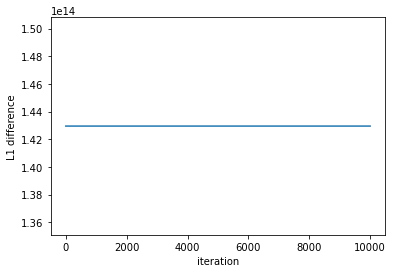

In [27]:
import matplotlib.pyplot as plt
x = np.arange(10000)
plt.plot(x, diffs)
plt.xlabel('iteration')
plt.ylabel('L1 difference')